In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

data = pd.read_csv('https://raw.githubusercontent.com/MakssMeiers/AdvAttacksResearch/main/properties_data.csv')
data.head() 

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [ ]:
column_names = data.columns
column_names

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [ ]:
col_name_array = ["neighborhood", "price_per_sqft", "id"]

In [ ]:
data.drop(
    labels=col_name_array,
    axis=1,
    inplace=True
)

column_names = data.columns
print(column_names)

Index(['latitude', 'longitude', 'price', 'size_in_sqft', 'no_of_bedrooms',
       'no_of_bathrooms', 'quality', 'maid_room', 'unfurnished', 'balcony',
       'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked',
       'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi',
       'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa',
       'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')


In [ ]:
data.no_of_bedrooms.value_counts()

2    729
1    639
3    338
0    124
4     70
5      5
Name: no_of_bedrooms, dtype: int64

In [ ]:
data.drop(data.index[data['no_of_bedrooms'] == 5], inplace=True)
data.drop(data.index[data['no_of_bedrooms'] == 4], inplace=True)
data.no_of_bedrooms.value_counts()

2    729
1    639
3    338
0    124
Name: no_of_bedrooms, dtype: int64

In [ ]:
data.no_of_bathrooms.value_counts()

2    723
3    550
1    311
4    210
5     35
6      1
Name: no_of_bathrooms, dtype: int64

In [ ]:
data.drop(data.index[data['no_of_bathrooms'] == 6], inplace=True)
data.drop(data.index[data['no_of_bathrooms'] == 5], inplace=True)
data.no_of_bathrooms.value_counts()

2    723
3    550
1    311
4    210
Name: no_of_bathrooms, dtype: int64

In [ ]:
data.drop(data.index[data['price'] >= 5*(10**6)], inplace=True)

In [ ]:
data.replace({False: 0, True: 1}, inplace=True)

In [ ]:
data.quality.value_counts()

Medium    1056
Low        507
High       118
Ultra       81
Name: quality, dtype: int64

In [ ]:
data.quality.replace({"Medium": 1, "Low": 2, "High":3, "Ultra":4}, inplace=True)

In [ ]:
data.head()

,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.113208,55.138932,2700000,1079,1,2,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,25.106809,55.151201,2850000,1582,2,2,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,25.227295,55.341761,2850000,2020,2,3,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,25.114275,55.139764,1729200,507,0,1,1,0,0,0,...,0,1,1,1,1,0,0,1,1,0
5,25.114275,55.139764,3119900,1015,1,2,1,0,0,0,...,0,1,1,1,1,0,0,1,1,0


In [ ]:
data.shape

(1762, 35)

In [ ]:
rows_size = data.shape[0]
columns_size = data.shape[1]

In [ ]:
column_names = data.columns
arr = np.array(data)
np.random.seed(13)
np.random.shuffle(arr)
index_values = [i for i in range(rows_size)]
data = pd.DataFrame(data = arr, index = index_values, columns = column_names)
data.head()

,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.189617,55.273196,2300000.0,1755.0,3.0,4.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.086726,55.145205,2140000.0,1736.0,3.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.111229,55.136449,2950000.0,2250.0,3.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.197316,55.274196,2100000.0,1135.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,25.109367,55.247980,896000.0,915.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train, test, error = (np.split(data, [int(0.8*len(data)), len(data)]))

In [ ]:
var_train_price = train.pop('price')
train_dataset = tf.data.Dataset.from_tensor_slices((train.values, var_train_price.values))

var_test_price = test.pop('price')
test_dataset = tf.data.Dataset.from_tensor_slices((test.values, var_test_price.values))

In [ ]:
batch_size = 32

train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

test_dataset = test_dataset.batch(batch_size, drop_remainder=False)

In [ ]:
normalize = tf.keras.layers.Normalization()
normalize.adapt(test)

In [ ]:
def create_weights(c_size, n):
  model = tf.keras.Sequential([
    n,
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(c_size-1,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
  ])
  return model

model = create_weights(columns_size, normalize)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 34)               69        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 87,814
Trainable params: 87,745
Non-trainable params: 69
___________________________________________________

In [ ]:
def compile_and_fit(model, tr_dataset,tst_dataset):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-3)),
                loss=tf.keras.losses.MeanSquaredError()
  )
  history = model.fit(tr_dataset, epochs=200,validation_data = tst_dataset) #, callbacks=[cp_callback]
  return model
model = compile_and_fit(model, train_dataset, test_dataset)

Epoch 1/200
44/44 [==============================] - 3s 23ms/step - loss: 3273251356672.0000 - val_loss: 3066788315136.0000
Epoch 2/200
44/44 [==============================] - 0s 10ms/step - loss: 3270410502144.0000 - val_loss: 3060489519104.0000
Epoch 3/200
44/44 [==============================] - 0s 10ms/step - loss: 3251110150144.0000 - val_loss: 3028265730048.0000
Epoch 4/200
44/44 [==============================] - 0s 10ms/step - loss: 3180028755968.0000 - val_loss: 2929264951296.0000
Epoch 5/200
44/44 [==============================] - 0s 9ms/step - loss: 2999986159616.0000 - val_loss: 2708189741056.0000
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 2651664416768.0000 - val_loss: 2323481100288.0000
Epoch 7/200
44/44 [==============================] - 0s 6ms/step - loss: 2123113431040.0000 - val_loss: 1798026690560.0000
Epoch 8/200
44/44 [==============================] - 0s 6ms/step - loss: 1506993504256.0000 - val_loss: 1255368818688.0000
Epoch 9/200


In [ ]:
model_results = model.predict(test_dataset)
price_results = np.array(var_test_price)
print(model_results.shape)

12/12 [==============================] - 0s 2ms/step
(353, 1)


In [ ]:
def create_model(data):
  column_names = data.columns
  rows_size = data.shape[0]
  columns_size = data.shape[1]
  arr = np.array(data)
  np.random.seed(13)
  np.random.shuffle(arr)
  index_values = [i for i in range(rows_size)]
  data = pd.DataFrame(data = arr, index = index_values, columns = column_names)

  train, test, error = (np.split(data, [int(0.8*len(data)), len(data)]))

  var_train_price = train.pop('price')
  train_dataset = tf.data.Dataset.from_tensor_slices((train.values, var_train_price.values))

  var_test_price = test.pop('price')
  test_dataset = tf.data.Dataset.from_tensor_slices((test.values, var_test_price.values))

  batch_size = 32

  train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

  test_dataset = test_dataset.batch(batch_size, drop_remainder=False)

  normalize = tf.keras.layers.Normalization()
  normalize.adapt(test)
  model = create_weights(columns_size, normalize)
  model = compile_and_fit(model, train_dataset, test_dataset)
  return model, test, var_test_price

In [ ]:
model_results_copy = model_results.copy()
price_results_copy = price_results.copy()

accuracy = np.average(np.absolute(model_results_copy - price_results_copy)) #/price_results_copy
print('accuracy: ',accuracy) # * 100, ' %'

accuracy:  925474.462839512


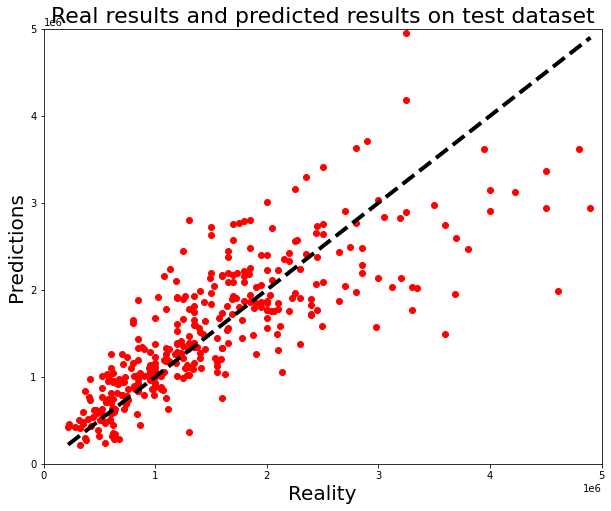

In [ ]:
def plot_results(model_results,results):
  fig, ax = plt.subplots(figsize=(10, 8))
  plt.plot(results,model_results, 'ro')
  plt.xlabel('Reality', fontsize = 20)
  plt.ylabel('Predictions', fontsize = 20)
  plt.title('Real results and predicted results on test dataset', fontsize = 22)

  plt.ylim(0, results.max()+10**5)
  plt.xlim(0, results.max()+10**5)

  ax.plot([results.min(), results.max()], [results.min(),results.max()], 'k--', lw=4)
  plt.show()

plot_results(model_results,price_results )

In [ ]:
data.head()

,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.189617,55.273196,2300000.0,1755.0,3.0,4.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.086726,55.145205,2140000.0,1736.0,3.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.111229,55.136449,2950000.0,2250.0,3.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.197316,55.274196,2100000.0,1135.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,25.109367,55.247980,896000.0,915.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
epsilon = [0 for i in range(34)]
epsilon[0] = 0.0001
epsilon[1] = 0.0001
epsilon[2] = 0.5
epsilon[3] = 0.05
epsilon[4] = 0.05
epsilon = tf.cast(tf.constant(np.array(epsilon)), tf.float64)
epsilon

<tf.Tensor: shape=(34,), dtype=float64, numpy=
array([1.e-04, 1.e-04, 5.e-01, 5.e-02, 5.e-02, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00])>

In [ ]:
def create_adversarial_pattern(x,y, model):
  mse = tf.keras.losses.MeanSquaredError()
  with tf.GradientTape() as tape:
    tape.watch(x)
    prediction = model(x)
    loss = mse(y, prediction)

  gradient = tape.gradient(loss, x)
  signed_grad = tf.sign(gradient)
  return signed_grad 

t_values_tensor = tf.cast(tf.constant(test.values), tf.float64)
adv_pattern = create_adversarial_pattern(t_values_tensor, var_test_price, model) * epsilon

In [ ]:
adv_pattern

<tf.Tensor: shape=(353, 34), dtype=float64, numpy=
array([[-1.e-04,  1.e-04, -5.e-01, ..., -0.e+00, -0.e+00,  0.e+00],
       [-1.e-04,  1.e-04, -5.e-01, ..., -0.e+00, -0.e+00,  0.e+00],
       [-1.e-04,  1.e-04, -5.e-01, ...,  0.e+00,  0.e+00, -0.e+00],
       ...,
       [-1.e-04,  1.e-04, -5.e-01, ..., -0.e+00, -0.e+00,  0.e+00],
       [-1.e-04,  1.e-04, -5.e-01, ...,  0.e+00, -0.e+00,  0.e+00],
       [-1.e-04,  1.e-04, -5.e-01, ..., -0.e+00, -0.e+00,  0.e+00]])>

In [ ]:
good_prediction = model(t_values_tensor)[0]
good_prediction

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1567197.6], dtype=float32)>

In [ ]:
t_values_tensor

<tf.Tensor: shape=(353, 34), dtype=float64, numpy=
array([[2.5207170e+01, 5.5348020e+01, 1.0560000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.5030350e+01, 5.5153016e+01, 9.1000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5096622e+01, 5.5315767e+01, 3.0030000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.5063791e+01, 5.5206684e+01, 7.1700000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.5209218e+01, 5.5281572e+01, 1.6200000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5237619e+01, 5.5255570e+01, 7.1900000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])>

In [ ]:
bad_tensor = tf.subtract(t_values_tensor, adv_pattern)
bad_tensor[0]

<tf.Tensor: shape=(34,), dtype=float64, numpy=
array([2.520727e+01, 5.534792e+01, 1.056500e+03, 6.500000e-01,
       2.350000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 0.000000e+00])>

In [ ]:
def modify_tensor(bad_tensor, amount=1):
  all_bad_arrays = bad_tensor.numpy()
  furniture_quality_var = False
  len_bad_arr = len(all_bad_arrays[0])
  if amount==-1:
    amount = len(all_bad_arrays)
  if len_bad_arr == 35:
    len_bad_arr -= 1
    furniture_quality_var = True
  for i in range(amount):
    bad_arr = all_bad_arrays[i]
    new_arr = [bad_arr[0],bad_arr[1]] 
    for j in range(2,len_bad_arr):
      k = 1
      if bad_arr[j]<0:
        k = -1
      new_arr.append(np.round_(k * bad_arr[j]))
    if furniture_quality_var:
      k = 1 
      if bad_arr[34]<0:
        k = -1
      new_arr.append(np.round_(k * bad_arr[34], decimals = 2))

    all_bad_arrays[i] = new_arr

  return tf.constant(all_bad_arrays)

In [ ]:
bad_prediction = model(bad_tensor)[0]
bad_prediction

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1578961.6], dtype=float32)>

In [ ]:
clean_bad_prediction = model(modify_tensor(bad_tensor))[0]

In [ ]:
def print_the_difference(good_prediction, bad_prediction, clean_bad_prediction,n=1):
  minus = lambda x,y,i: x.numpy()[i] - y.numpy()[i]
  procent_difference = lambda x,y,i : np.abs(minus(x,y,i) / x.numpy()[i] * 100)
  for i in range(n):
    print("Results: ", "model:", good_prediction.numpy()[i],  
        ",not clean adversarial:", bad_prediction.numpy()[i], 
        ",clean adversarial:", clean_bad_prediction.numpy()[i])
    print("The differnce: ", minus(good_prediction, bad_prediction,i), 
          minus(good_prediction, clean_bad_prediction,i))
    print("The differnce, %: ", procent_difference(good_prediction, bad_prediction,i), 
          procent_difference(good_prediction, clean_bad_prediction,i))
  
print_the_difference(good_prediction, bad_prediction, clean_bad_prediction)


Results:  model: 1567197.6 ,not clean adversarial: 1578961.6 ,clean adversarial: 1655104.0
The differnce:  -11764.0 -87906.375
The differnce, %:  0.750639196485281 5.6091442704200745


In [ ]:
t_values_tensor = tf.cast(tf.constant(test.values), tf.float64)
original_tensor = tf.cast(tf.constant(test.values), tf.float64)
some_loss = tf.cast(tf.constant(np.array([1000 for i in range(353)])), tf.float32)
y = var_test_price
for i in range(30):
  adv_pattern = create_adversarial_pattern(t_values_tensor, y, model)
  adv_pattern = tf.math.multiply(adv_pattern, epsilon)
  t_values_tensor = tf.subtract(t_values_tensor, adv_pattern)
  y = model(t_values_tensor)
  y = tf.add(y, some_loss)
clean_bad_tensor = modify_tensor(t_values_tensor,-1)
original_tensor[0],t_values_tensor[0], clean_bad_tensor[0], tf.subtract(original_tensor,t_values_tensor)[0], tf.subtract(original_tensor,clean_bad_tensor)[0]

(<tf.Tensor: shape=(34,), dtype=float64, numpy=
 array([2.520997e+01, 5.534522e+01, 1.070000e+03, 2.000000e+00,
        2.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00])>,
 <tf.Tensor: shape=(34,), dtype=float64, numpy=
 array([2.521277e+01, 5.534242e+01, 1.084000e+03, 3.400000e+00,
        3.400000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+0

In [ ]:
good_prediction = model(original_tensor)
bad_prediction = model(t_values_tensor)
clean_bad_prediction = model(clean_bad_tensor)
print_the_difference(good_prediction[0], bad_prediction[0], clean_bad_prediction[0])

Results:  model: 1944254.6 ,not clean adversarial: 2437008.8 ,clean adversarial: 2301395.8
The differnce:  -492754.12 -357141.12
The differnce, %:  25.344115495681763 18.369051814079285


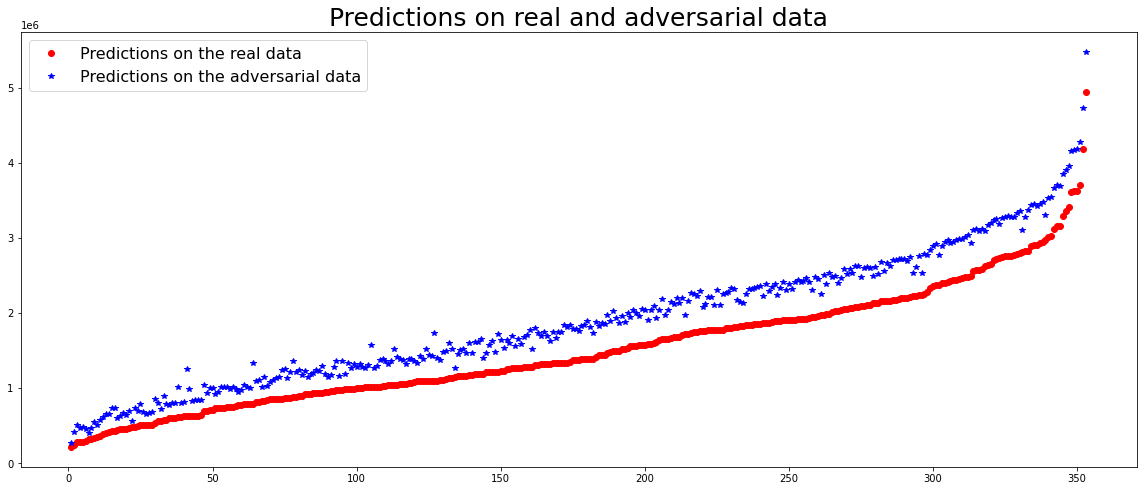

In [ ]:
tm_good = good_prediction.numpy()
good_prediction_np = []
tm_bad = clean_bad_prediction.numpy()
clean_bad_prediction_np = []
for i in range(353):
  good_prediction_np.append(tm_good[i][0])
  clean_bad_prediction_np.append(tm_bad[i][0])
good_prediction_np = np.array(good_prediction_np)
indices = np.argsort(good_prediction_np)
good_prediction_np = np.sort(good_prediction_np)
clean_bad_prediction_np = np.array(clean_bad_prediction_np)
clean_bad_prediction_np = clean_bad_prediction_np[indices]
a = np.array([i for i in range(1,354)])

fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Predictions on real and adversarial data', fontsize = 25)

real, = ax.plot(a,good_prediction_np,'ro',label= "Predictions on the real data")
adv, = ax.plot(a,clean_bad_prediction_np,'b*',label= "Predictions on the adversarial data")
ax.legend(handles=[real, adv], fontsize = 16)

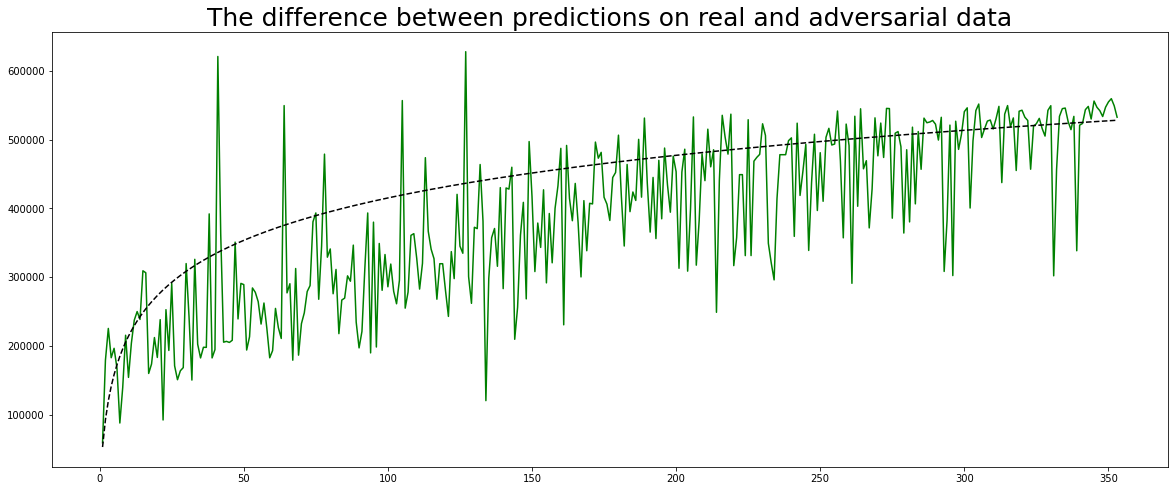

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('The difference between predictions on real and adversarial data', fontsize = 25)
ax.plot(a,clean_bad_prediction_np - good_prediction_np, 'g')
b = 9 * 10**4 * np.log([0.8 + i for i in range(1,354)])
ax.plot(a,b,'k--')

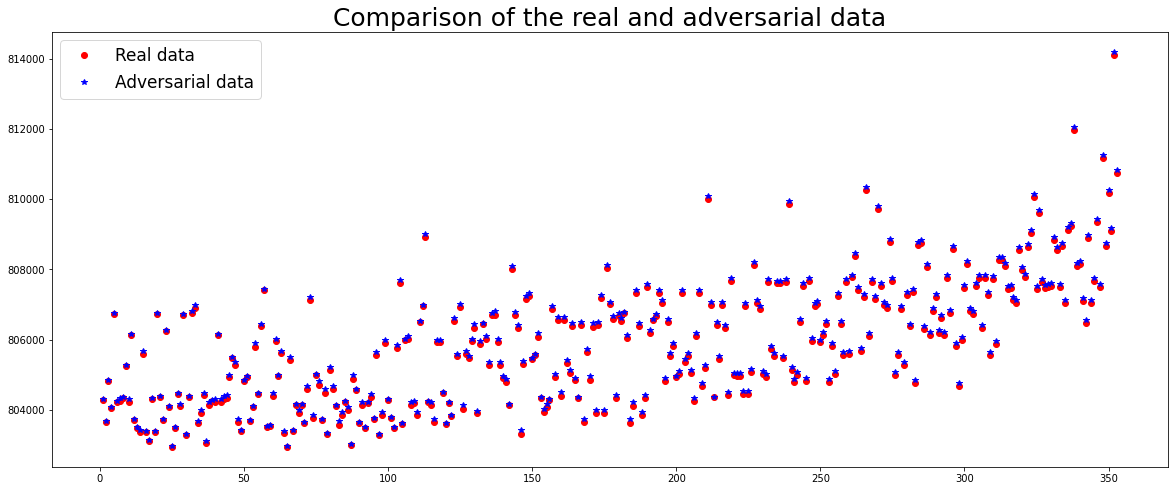

In [ ]:
original = original_tensor.numpy()
original = original[indices]
bad = t_values_tensor.numpy()
bad = bad[indices]
epsilon_reversed = [0 for i in range(34)]
epsilon_reversed[0] = 1 / 0.0001
epsilon_reversed[1] = 1 / 0.0001
epsilon_reversed[2] = 1 / 0.5
epsilon_reversed[3] = 1 / 0.05
epsilon_reversed[4] = 1 / 0.05
original = original * epsilon_reversed
bad = bad * epsilon_reversed
original_sums = []
bad_sums = []
for i in range(353):
  original_sums.append(np.sum(original[i]))
  bad_sums.append(np.sum(bad[i]))
original_sums = np.array(original_sums)
bad_sums = np.array(bad_sums)

fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Comparison of the real and adversarial data', fontsize = 25)
real_data, = ax.plot(a,original_sums,'ro', label="Real data")
adv_data, = ax.plot(a,bad_sums,'b*',  label="Adversarial data")
ax.legend(handles=[real_data, adv_data], fontsize = 17)

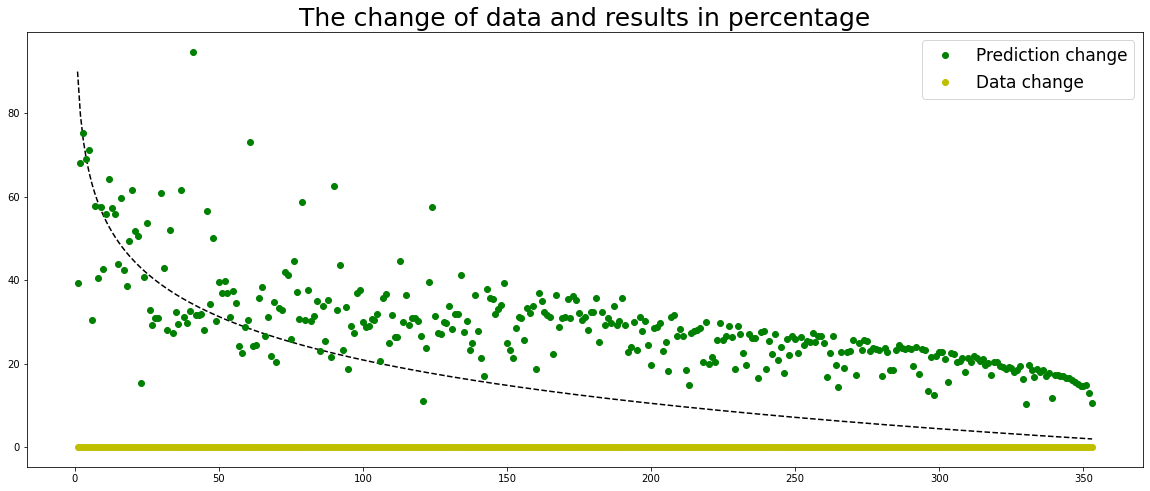

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('The change of data and results in percentage', fontsize = 25)
b = (-1 * np.log([i * 0.05 for i in range(1,354)]) + 3) * 15
ax.plot(a,b,'k--')
prediction_change, = ax.plot(a,((clean_bad_prediction_np / good_prediction_np)-1)*100,
                             'go', label="Prediction change")
data_change, = ax.plot(a,((bad_sums / original_sums)-1)*100,'yo',
                       label="Data change")
ax.legend(handles=[prediction_change, data_change], fontsize = 17)

In [ ]:
differnce_between_input_values = ((bad_sums / original_sums)-1)*100
for i in range(20):     
  print(differnce_between_input_values[i])

0.0037299619449315813
0.0037328657726654058
0.003727485011917331
0.0037310589526384774
0.0037186965238467096
0.003730328903106539
0.011190298359342599
0.0037297705171468465
0.003725501520990271
0.01044461611732217
0.0037214689857512084
0.00373263345614383
0.003733768328828546
0.0037341698735593454
0.01117195398616655
0.0037342019451047648
0.0037354266064992814
0.0037298490242809734
0.0037342416401742184
0.00371865102795077


In [ ]:
column_names = data.columns
column_names = np.delete(column_names,2) #deleting price column name
column_names

Index(['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms',
       'no_of_bathrooms', 'quality', 'maid_room', 'unfurnished', 'balcony',
       'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked',
       'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi',
       'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa',
       'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [ ]:
pd.DataFrame(original_tensor.numpy(), columns = column_names)

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.209970,55.345220,1070.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25.033350,55.150016,925.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,25.099422,55.312967,3017.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.205730,55.345110,1582.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.003373,55.246629,1205.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,25.240419,55.252770,2007.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,25.194761,55.282343,1445.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
350,25.066791,55.203684,732.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
351,25.212018,55.278772,1634.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(clean_bad_tensor.numpy(), columns = column_names)

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.212770,55.342420,1084.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25.036350,55.147016,940.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,25.102222,55.310167,3031.0,3.0,4.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.208530,55.342310,1596.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.006373,55.243629,1220.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,25.243219,55.249970,2021.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,25.197561,55.279543,1459.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
350,25.069791,55.200684,747.0,2.0,1.0,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
351,25.214818,55.275972,1648.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


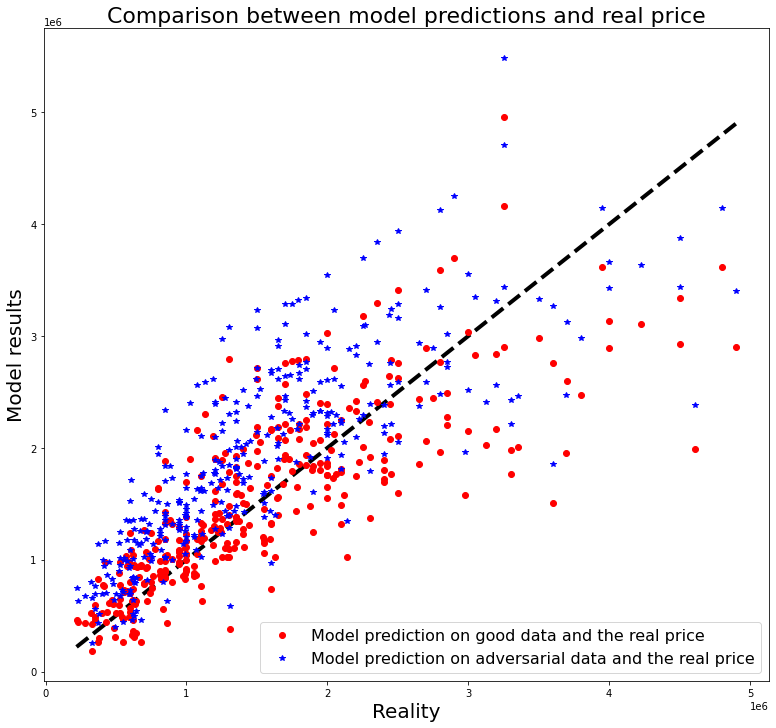

In [ ]:
price_results = np.array(var_test_price)
price_results = price_results[indices]

fig, ax = plt.subplots(figsize=(13, 12))
plt.title('Comparison between model predictions and real price', fontsize = 22)
plt.xlabel('Reality', fontsize = 20)
plt.ylabel('Model results', fontsize = 20)
ax.plot([price_results.min(), price_results.max()], [price_results.min(),price_results.max()], 'k--', lw=4)
good_model_res, = ax.plot(price_results,good_prediction_np, 'ro', label="Model prediction on good data and the real price")
adv_model_res, = ax.plot(price_results,clean_bad_prediction_np,  'b*', label="Model prediction on adversarial data and the real price")
ax.legend(handles=[good_model_res, adv_model_res], fontsize = 16)

Ax + By + C = 0 - is line, y = x => A = 1, B = 1, C = 0

R(Rx, Ry) - dot

d = 	|A·Rx + B·Ry + C| /
√(A^2 + B^2)
=> d  = (Rx + Ry) / √2

In [ ]:
data_copy = data.copy()
var_price_results = data_copy.pop("price")

all_dataset = tf.data.Dataset.from_tensor_slices((data_copy.values, var_price_results.values))
all_dataset = all_dataset.batch(batch_size, drop_remainder=False)

model_all_results = model.predict(all_dataset)
all_price_results = np.array(var_price_results)

56/56 [==============================] - 0s 2ms/step


In [ ]:
sqrt_2 = np.sqrt(2)
count_distance = lambda a,b: (a+b)/sqrt_2

distance_simple_array = []
for i in range(len(model_all_results)):
  k = 1
  if model_all_results[i]<all_price_results[i]:
    k = -1
  distance_simple_array.append(k * count_distance(model_all_results[i], all_price_results[i]))

distance_array = np.array(distance_simple_array)
distance_max = distance_array.max()
distance_min = distance_array.min()
distance_max , distance_min 

(6241429.5, -6216804.5)

Let's add new varuable - furniture quality, it's value will be from 1.0 to 5.0

Maximum -  6254265.0 is 5, minimum -6228856.5 is 1,
when distance is ~0, then it is 3.0

if distance is >0, this means that price is above it's proper value, 
if distance is <0, than it means smaller

let's add a |minimum| to all values in order for minimum to be 0,

than maximum will be = 6254265.0 + 6228856.5 =  12483121.5

12483121.5 is 5
distance is x

x = 5 * distance / 12483121.5 ≈ distance / 2496624.3

x = distance / 2400000.0 - in order to not make the model very accurate


In [ ]:
plus_distance = round(2 + (distance_min* - 1))
plus_distance

6216806

In [ ]:
count_quality = lambda x : (x+plus_distance) /  2400000

In [ ]:
quality_array = np.round_(count_quality(distance_array),2)
quality_array

array([[4.17],
       [3.89],
       [4.36],
       ...,
       [3.12],
       [3.87],
       [3.51]])

In [ ]:
dataV2 = data.copy()
dataV2["furniture_quality"] = quality_array
dataV2.head()

,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,furniture_quality
0,25.189617,55.273196,2300000.0,1755.0,3.0,4.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.17
1,25.086726,55.145205,2140000.0,1736.0,3.0,3.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.89
2,25.111229,55.136449,2950000.0,2250.0,3.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.36
3,25.197316,55.274196,2100000.0,1135.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.38
4,25.109367,55.247980,896000.0,915.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.14


In [ ]:
modelV2, x, y = create_model(dataV2)
print(modelV2.summary())

In [ ]:
modelV2_results = modelV2(tf.cast(tf.constant(x.values), tf.float64))

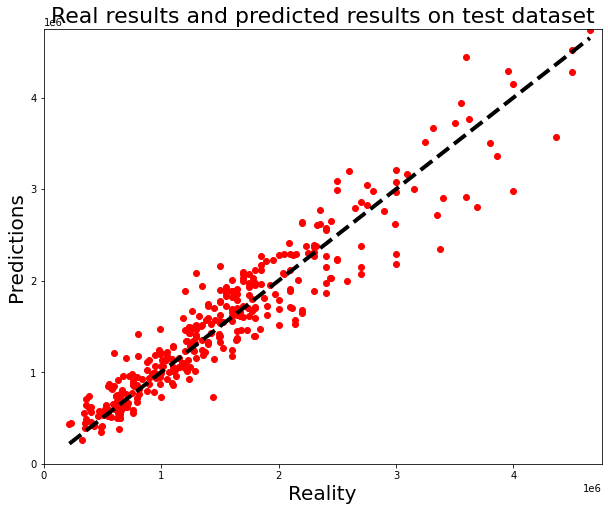

In [ ]:
plot_results(modelV2_results,y )

In [ ]:
epsilon = [0 for i in range(35)]
epsilon[0] = 0.0001
epsilon[1] = 0.0001
epsilon[2] = 0.5
epsilon[3] = 0.05
epsilon[4] = 0.05
epsilon[34] = 0.005
epsilon = tf.cast(tf.constant(np.array(epsilon)), tf.float64)
epsilon

t_values_tensor = tf.cast(tf.constant(x.values), tf.float64)
original_tensor = tf.cast(tf.constant(x.values), tf.float64)
some_loss = tf.cast(tf.constant(np.array([1000 for i in range(353)])), tf.float32)
price_copy = y.copy()
for i in range(30):
  adv_pattern = create_adversarial_pattern(t_values_tensor, price_copy, modelV2)
  adv_pattern = tf.math.multiply(adv_pattern, epsilon)
  t_values_tensor = tf.subtract(t_values_tensor, adv_pattern)
  price_copy = modelV2(t_values_tensor)
  price_copy = tf.add(price_copy, some_loss)
clean_bad_tensor = modify_tensor(t_values_tensor,-1)
original_tensor[0],t_values_tensor[0], clean_bad_tensor[0], tf.subtract(original_tensor,t_values_tensor)[0], tf.subtract(original_tensor,clean_bad_tensor)[0]

(<tf.Tensor: shape=(35,), dtype=float64, numpy=
 array([2.5193542e+01, 5.5277061e+01, 1.4420000e+03, 1.0000000e+00,
        2.0000000e+00, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.7500000e+00])>,
 <tf.Tensor: shape=(35,), dtype=float64, numpy=
 array([2.5196342e+01, 5.5274261e+01, 1.4560000e+03, 2.4000000e+00,
        3.4000000e+00, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000

Results:  model: 1626823.6 ,not clean adversarial: 2282983.5 ,clean adversarial: 2114942.5
The differnce:  -656159.9 -488118.88
The differnce, %:  -40.33380448818207 -30.004411935806274


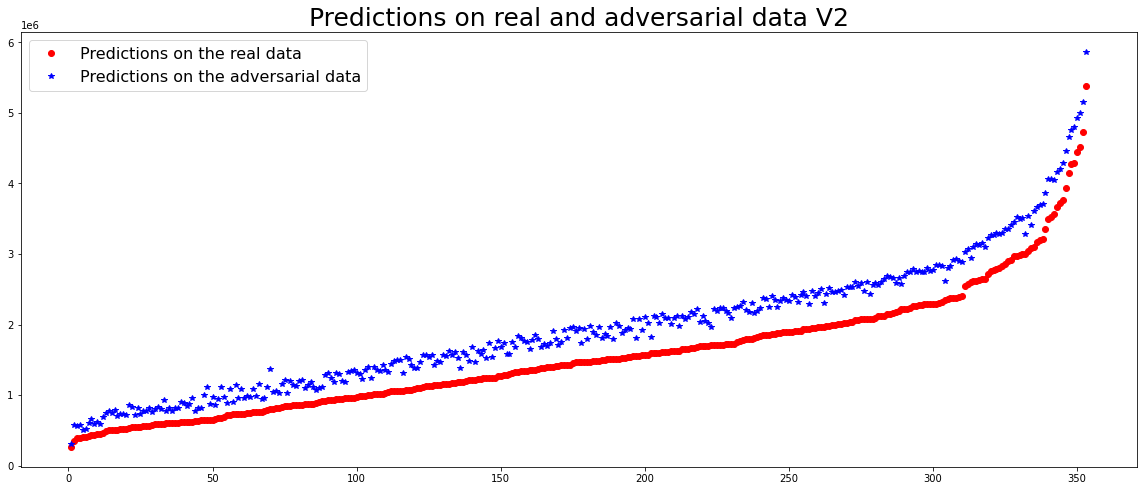

In [ ]:
good_predictionV2 = modelV2(original_tensor)
bad_predictionV2 = modelV2(t_values_tensor)
clean_bad_predictionV2 = modelV2(clean_bad_tensor)
print_the_difference(good_predictionV2[0], bad_predictionV2[0], clean_bad_predictionV2[0])

tm_good = good_predictionV2.numpy()
good_prediction_npV2 = []
tm_bad = clean_bad_predictionV2.numpy()
clean_bad_prediction_npV2 = []
for i in range(353):
  good_prediction_npV2.append(tm_good[i][0])
  clean_bad_prediction_npV2.append(tm_bad[i][0])
good_prediction_npV2 = np.array(good_prediction_npV2)
indicesV2 = np.argsort(good_prediction_npV2)
good_prediction_npV2 = np.sort(good_prediction_npV2)
clean_bad_prediction_npV2 = np.array(clean_bad_prediction_npV2)
clean_bad_prediction_npV2 = clean_bad_prediction_npV2[indicesV2]
a = np.array([i for i in range(1,354)])
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Predictions on real and adversarial data V2', fontsize = 25)

real, = ax.plot(a,good_prediction_npV2,'ro',label= "Predictions on the real data")
adv, = ax.plot(a,clean_bad_prediction_npV2,'b*',label= "Predictions on the adversarial data")
ax.legend(handles=[real, adv], fontsize = 16)

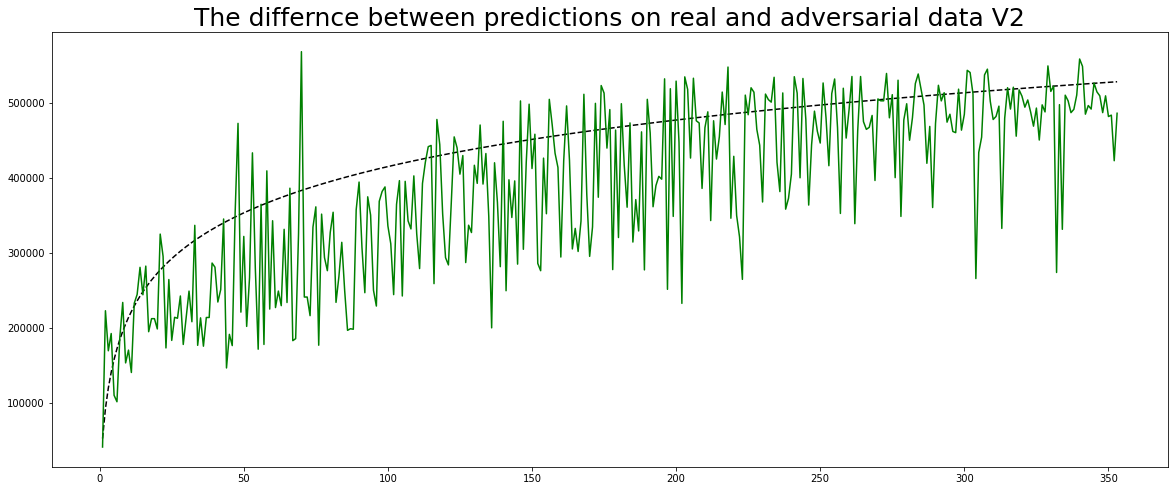

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('The differnce between predictions on real and adversarial data V2', fontsize = 25)
b = 9 * 10**4 * np.log([0.8 + i for i in range(1,354)])
ax.plot(a,b,'k--')
ax.plot(a,clean_bad_prediction_npV2 - good_prediction_npV2, 'g')

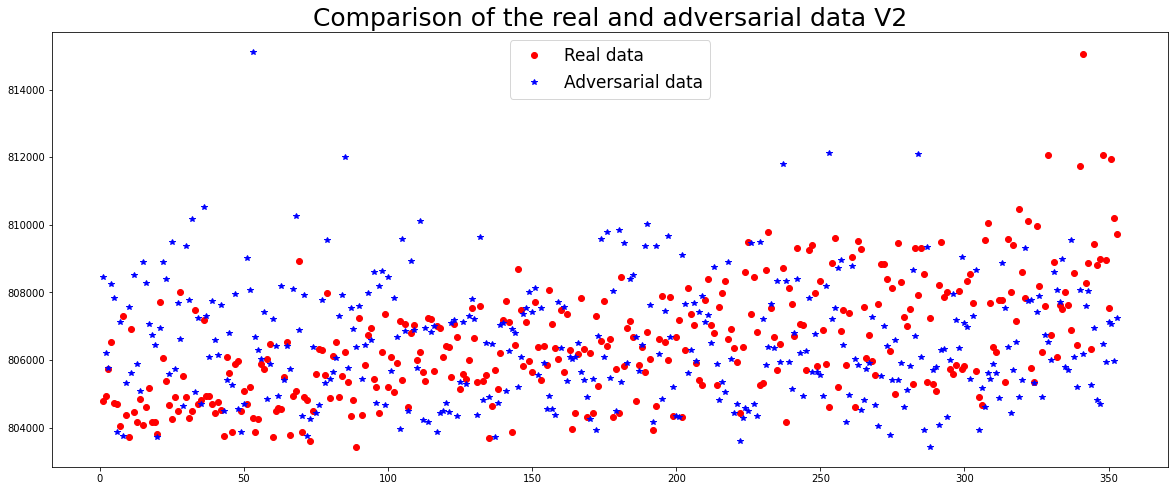

In [ ]:
original = original_tensor.numpy()
original = original[indicesV2]
bad = t_values_tensor.numpy()
epsilon_reversed = [0 for i in range(35)]
epsilon_reversed[0] = 1 / 0.0001
epsilon_reversed[1] = 1 / 0.0001
epsilon_reversed[2] = 1 / 0.5
epsilon_reversed[3] = 1 / 0.05
epsilon_reversed[4] = 1 / 0.05
epsilon_reversed[34]= 1 / 0.005
original = original * epsilon_reversed
bad = bad * epsilon_reversed
original_sums = []
bad_sums = []
for i in range(353):
  original_sums.append(np.sum(original[i]))
  bad_sums.append(np.sum(bad[i]))
original_sums = np.array(original_sums)
bad_sums = np.array(bad_sums)

fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Comparison of the real and adversarial data V2', fontsize = 25)
real_data, = ax.plot(a,original_sums,'ro', label="Real data")
adv_data, = ax.plot(a,bad_sums,'b*',  label="Adversarial data")
ax.legend(handles=[real_data, adv_data], fontsize = 17)

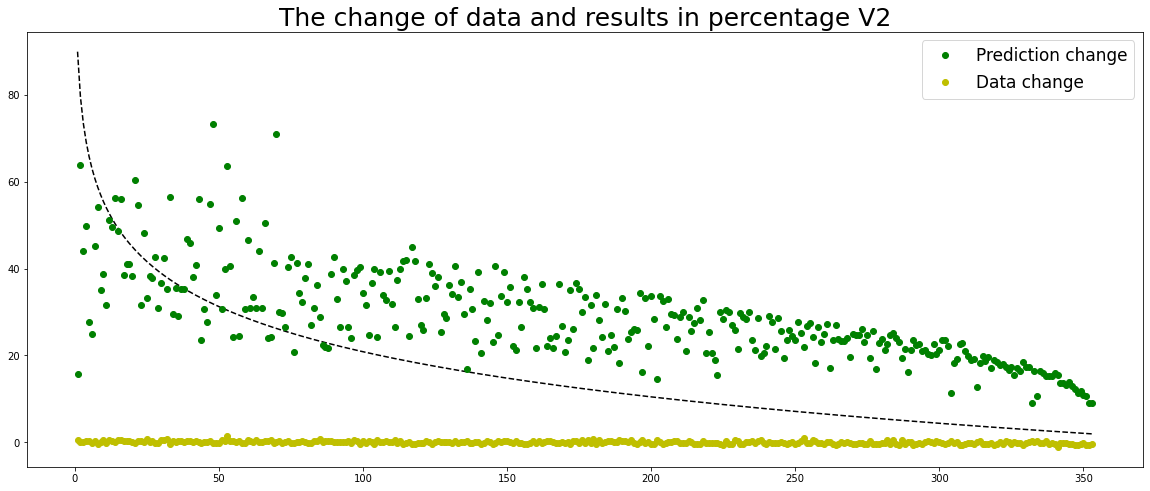

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('The change of data and results in percentage V2', fontsize = 25)
b = (-1 * np.log([i * 0.05 for i in range(1,354)]) + 3) * 15
ax.plot(a,b,'k--')
prediction_change, = ax.plot(a,((clean_bad_prediction_npV2 / good_prediction_npV2)-1)*100,
                             'go', label="Prediction change")
data_change, = ax.plot(a,((bad_sums / original_sums)-1)*100,'yo',
                       label="Data change")
ax.legend(handles=[prediction_change, data_change], fontsize = 17)

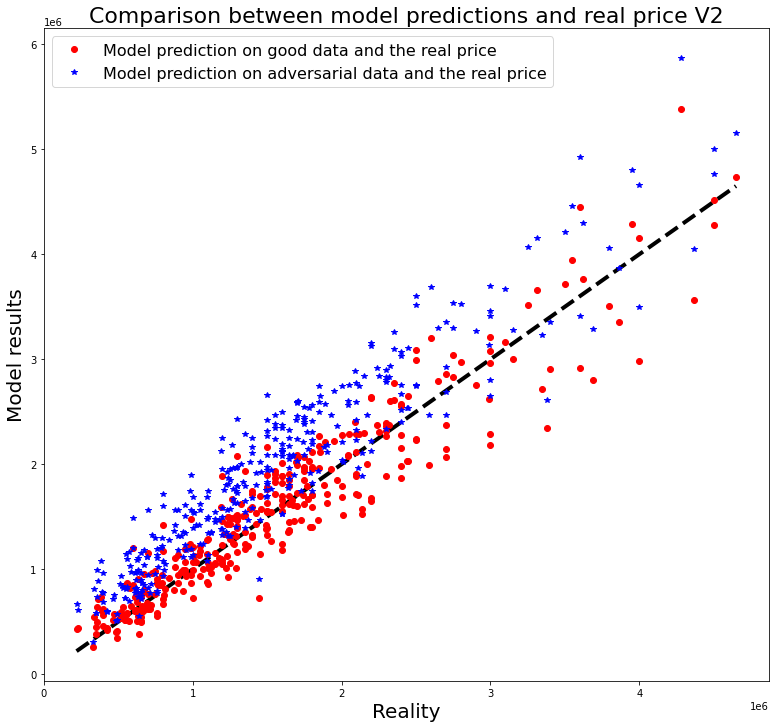

In [ ]:
price_results = np.array(y)
price_results = price_results[indicesV2]

fig, ax = plt.subplots(figsize=(13, 12))
plt.title('Comparison between model predictions and real price V2', fontsize = 22)
plt.xlabel('Reality', fontsize = 20)
plt.ylabel('Model results', fontsize = 20)
ax.plot([price_results.min(), price_results.max()], [price_results.min(),price_results.max()], 'k--', lw=4)
good_model_res, = ax.plot(price_results,good_prediction_npV2, 'ro', label="Model prediction on good data and the real price")
adv_model_res, = ax.plot(price_results,clean_bad_prediction_npV2,  'b*', label="Model prediction on adversarial data and the real price")
ax.legend(handles=[good_model_res, adv_model_res], fontsize = 16)

In [ ]:
column_names = dataV2.columns
column_names = np.delete(column_names,2) #deleting price column name
column_names

Index(['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms',
       'no_of_bathrooms', 'quality', 'maid_room', 'unfurnished', 'balcony',
       'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked',
       'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi',
       'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa',
       'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet', 'furniture_quality'],
      dtype='object')

In [ ]:
pd.DataFrame(original_tensor.numpy(), columns = column_names)

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,furniture_quality
0,25.193542,55.277061,1442.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75
1,25.187683,55.269900,485.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.13
2,25.033564,55.146640,1556.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29
3,25.194547,55.282429,1566.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.94
4,25.193310,55.280919,1338.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,25.088728,55.173310,1418.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.68
349,25.197262,55.270028,847.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25
350,25.190790,55.271959,836.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28
351,25.046296,55.200783,1350.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.20


In [ ]:
pd.DataFrame(clean_bad_tensor.numpy(), columns = column_names)

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,furniture_quality
0,25.196342,55.274261,1456.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.61
1,25.190683,55.266900,500.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.98
2,25.036564,55.143640,1571.0,4.0,5.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.14
3,25.197347,55.279629,1580.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.80
4,25.196110,55.278119,1352.0,3.0,4.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,25.091528,55.170510,1432.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.54
349,25.200262,55.267028,862.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10
350,25.193790,55.268959,851.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.13
351,25.049296,55.197783,1365.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.05


In [ ]:
tf.keras.backend.clear_session()